# Distributions before PV re-fit

## Prepare Env & Import Data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sys
import os
import io
from contextlib import redirect_stdout, redirect_stderr


try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()

parent_dir = os.path.join(current_dir, '..')
sys.path.insert(0, parent_dir)


df = pd.read_csv('/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/ana_PV_27_var_2.csv')

## max_chi2 distribution

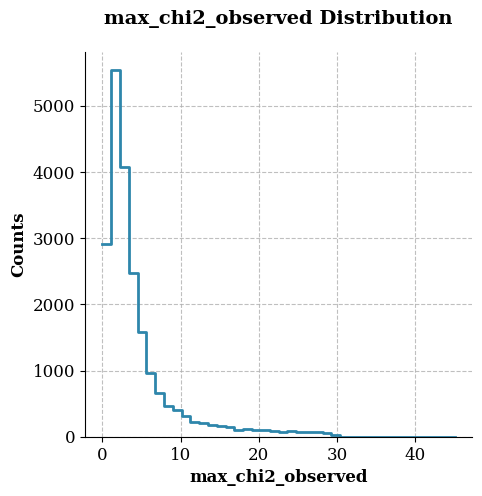

In [11]:
from analysis_scripts.draw_scripts import hist_plot


fig, ax = plt.subplots(figsize=(5, 5))

hist_plot(
    data=df[(df['max_chi2_cut'] == 30.0) & (df['max_chi2_observed'] < 50.0)],
    distr_name='max_chi2_observed',
    ax=ax,
    bins=40
)

In [12]:
PV_diff_x = df.loc[df['max_chi2_cut'] == 30.0, 'PV_diff_x']
PV_diff_y = df.loc[df['max_chi2_cut'] == 30.0, 'PV_diff_y']
PV_diff_z = df.loc[df['max_chi2_cut'] == 30.0, 'PV_diff_z']


# zeroth approximation
print(f'x-projection PV resolution [cm]: {PV_diff_x[abs(PV_diff_x) < 0.03].std() * 1e4}')
print(f'y-projection PV resolution [cm]: {PV_diff_y[abs(PV_diff_x) < 0.03].std() * 1e4}')
print(f'z-projection PV resolution [cm]: {PV_diff_z[abs(PV_diff_x) < 0.03].std() * 1e4}')

x-projection PV resolution [cm]: 76.9529610079893
y-projection PV resolution [cm]: 101.00247485192561
z-projection PV resolution [cm]: 123.34041128889754


### x-projection

Method: Nelder-Mead
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
****************************************************************************************************
New best method: Powell, success: True
****************************************************************************************************
Method: CG
Method: BFGS
Method: Newton-CG
Method: L-BFGS-B
Method: TNC
Method: COBYLA
Method: COBYQA
Method: SLSQP
Skip method: SLSQP
Method: trust-constr
Method: dogleg
Method: trust-ncg
Method: trust-exact
Method: trust-krylov
********************************************************************************
********************************************************************************
********************************************************************************
best_m

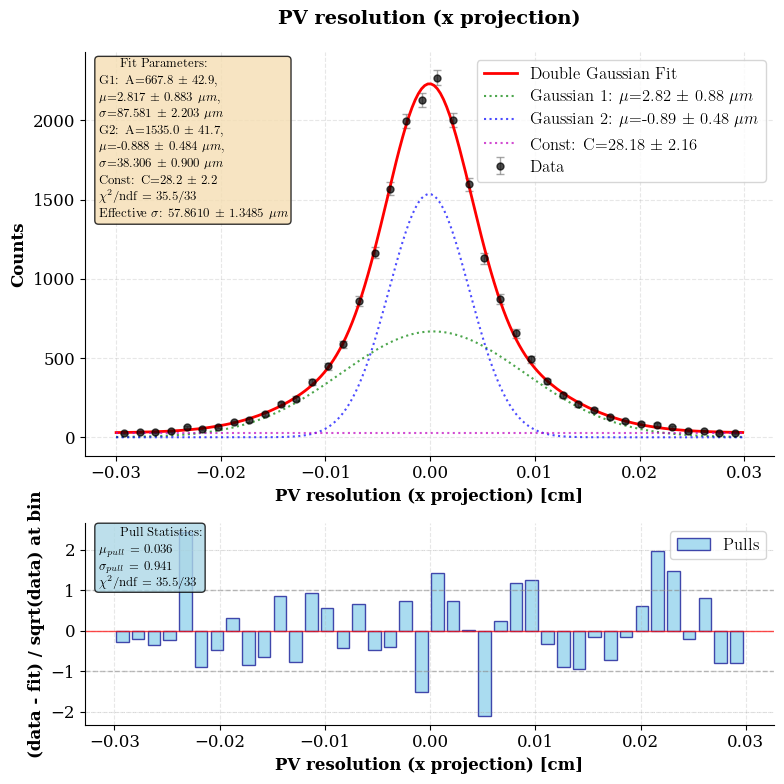

In [13]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


distr_name = 'PV_diff_x'
sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    with redirect_stdout(io.StringIO()), redirect_stderr(io.StringIO()):
        try:
            fit_res = fit_distr_double_gauss(
                distr=sig_PV_df_sel,
                title=distr_name,
                x_label=distr_name + ' [cm]',
                optimize_method=method,
                plot=False,
                bins=40,
                max_iter=1000
            )
        except:
            print(f'Skip method: {method}')
            continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (x projection)',
    x_label='PV resolution (x projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### y-projection

Method: Nelder-Mead
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
****************************************************************************************************
New best method: Powell, success: True
****************************************************************************************************
Method: CG
Method: BFGS
Method: Newton-CG
Method: L-BFGS-B
Method: TNC
Method: COBYLA
Method: COBYQA
Method: SLSQP
Skip method: SLSQP
Method: trust-constr
Method: dogleg
Method: trust-ncg
Method: trust-exact
Method: trust-krylov
********************************************************************************
********************************************************************************
********************************************************************************
best_m

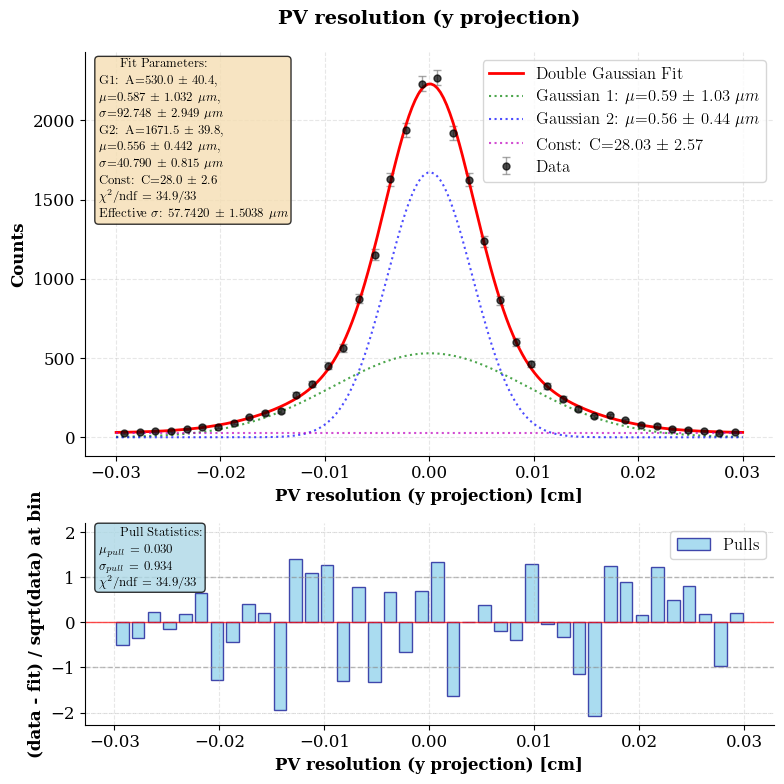

In [14]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


distr_name = 'PV_diff_y'
sig_PV_df_sel = PV_diff_y[abs(PV_diff_y) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    with redirect_stdout(io.StringIO()), redirect_stderr(io.StringIO()):
        try:
            fit_res = fit_distr_double_gauss(
                distr=sig_PV_df_sel,
                title=distr_name,
                x_label=distr_name + ' [cm]',
                optimize_method=method,
                plot=False,
                bins=40,
                max_iter=1000
            )
        except:
            print(f'Skip method: {method}')
            continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (y projection)',
    x_label='PV resolution (y projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### z-projection

Method: Nelder-Mead
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
****************************************************************************************************
New best method: Powell, success: True
****************************************************************************************************
Method: CG
Method: BFGS
Method: Newton-CG
Method: L-BFGS-B
Method: TNC
Method: COBYLA
Method: COBYQA
Method: SLSQP
Skip method: SLSQP
Method: trust-constr
****************************************************************************************************
New best method: trust-constr, success: True
****************************************************************************************************
Method: dogleg
Method: trust-ncg
Method: trust-exact
Method: trust-krylov
**

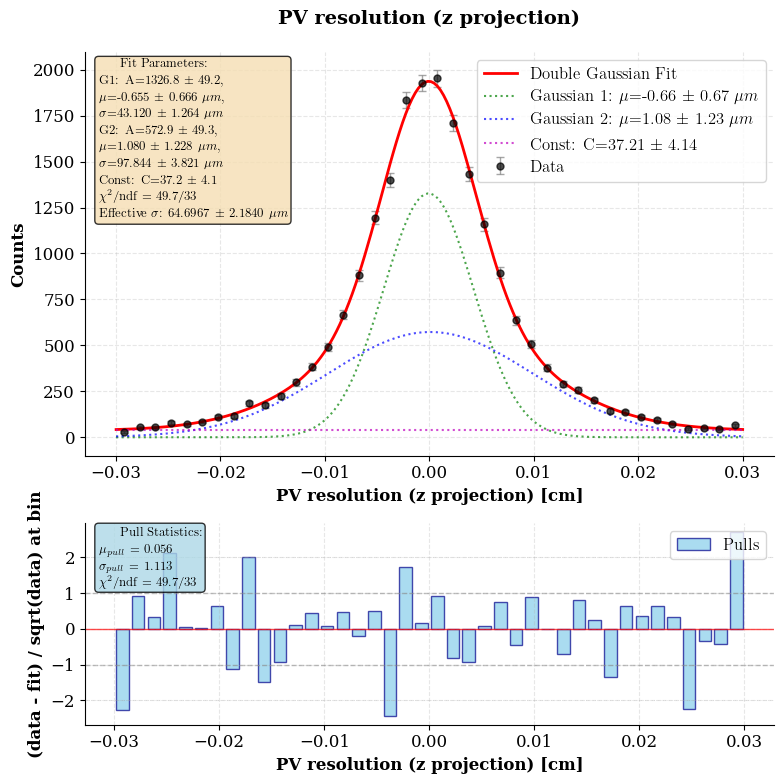

In [15]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


distr_name = 'PV_diff_z'
sig_PV_df_sel = PV_diff_z[abs(PV_diff_z) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    with redirect_stdout(io.StringIO()), redirect_stderr(io.StringIO()):
        try:
            fit_res = fit_distr_double_gauss(
                distr=sig_PV_df_sel,
                title=distr_name,
                x_label=distr_name + ' [cm]',
                optimize_method=method,
                plot=False,
                bins=40,
                max_iter=1000
            )
        except:
            print(f'Skip method: {method}')
            continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (z projection)',
    x_label='PV resolution (z projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

# Distributions after PV re-fit (Var-1)

## Prepare Env & Import Data

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import os


try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()

parent_dir = os.path.join(current_dir, '..')
sys.path.insert(0, parent_dir)


df = pd.read_csv('/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/ana_PV_27_var_1.csv')

## max_chi2 distribution

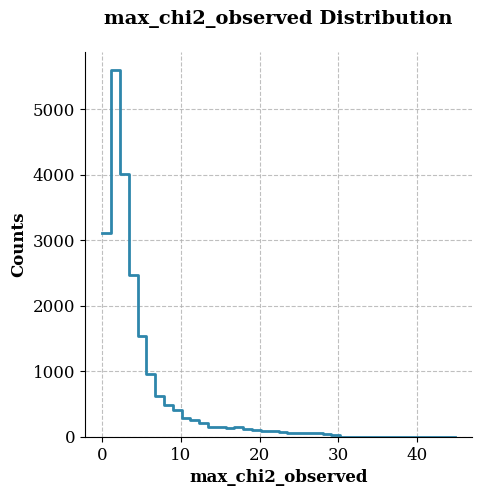

In [17]:
from analysis_scripts.draw_scripts import hist_plot


fig, ax = plt.subplots(figsize=(5, 5))

hist_plot(
    data=df[(df['max_chi2_cut'] == 30.0) & (df['max_chi2_observed'] < 50.0)],
    distr_name='max_chi2_observed',
    ax=ax,
    bins=40
)

## zeroth approximation

In [18]:
res_x = []
res_y = []
res_z = []

cuts = sorted(df['max_chi2_cut'].unique(), reverse=True)

for cut in cuts:

    PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_x']
    PV_diff_y = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_y']
    PV_diff_z = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_z']

    print(f'\n{'='*50}\nCut value: {cut}\n{'='*50}')

    res_x_val = PV_diff_x[abs(PV_diff_x) < 0.03].std() * 1e4
    res_y_val = PV_diff_y[abs(PV_diff_y) < 0.03].std() * 1e4
    res_z_val = PV_diff_z[abs(PV_diff_z) < 0.03].std() * 1e4

    res_x.append(res_x_val)
    res_y.append(res_y_val)
    res_z.append(res_z_val)

    print(f'Mean number of removed tracks: {df.loc[df['max_chi2_cut'] == cut, 'num_removed_tracks'].mean()}')
    print(f'x-projection PV resolution [cm]: {res_x_val}')
    print(f'y-projection PV resolution [cm]: {res_y_val}')
    print(f'z-projection PV resolution [cm]: {res_z_val}')
    
res_x = np.array(res_x)
res_y = np.array(res_y)
res_z = np.array(res_z)

print(f'Best x at cut: {cuts[res_x.argmin()]}')
print(f'Best y at cut: {cuts[res_y.argmin()]}')
print(f'Best z at cut: {cuts[res_z.argmin()]}')


Cut value: 30.0
Mean number of removed tracks: 0.07870283461610662
x-projection PV resolution [cm]: 71.29227248203492
y-projection PV resolution [cm]: 71.02196049141884
z-projection PV resolution [cm]: 79.85447634793825

Cut value: 12.0
Mean number of removed tracks: 0.1612539891120706
x-projection PV resolution [cm]: 69.38876134624813
y-projection PV resolution [cm]: 69.00269124641073
z-projection PV resolution [cm]: 77.80652535593163

Cut value: 11.0
Mean number of removed tracks: 0.17486390088229772
x-projection PV resolution [cm]: 69.17390539132916
y-projection PV resolution [cm]: 68.84274775258532
z-projection PV resolution [cm]: 77.63835643439738

Cut value: 10.0
Mean number of removed tracks: 0.18960015017833678
x-projection PV resolution [cm]: 68.8520059856255
y-projection PV resolution [cm]: 68.5746304010623
z-projection PV resolution [cm]: 77.45893628992356

Cut value: 9.0
Mean number of removed tracks: 0.2093579876102872
x-projection PV resolution [cm]: 68.67850679810003
y-

## Cut properties

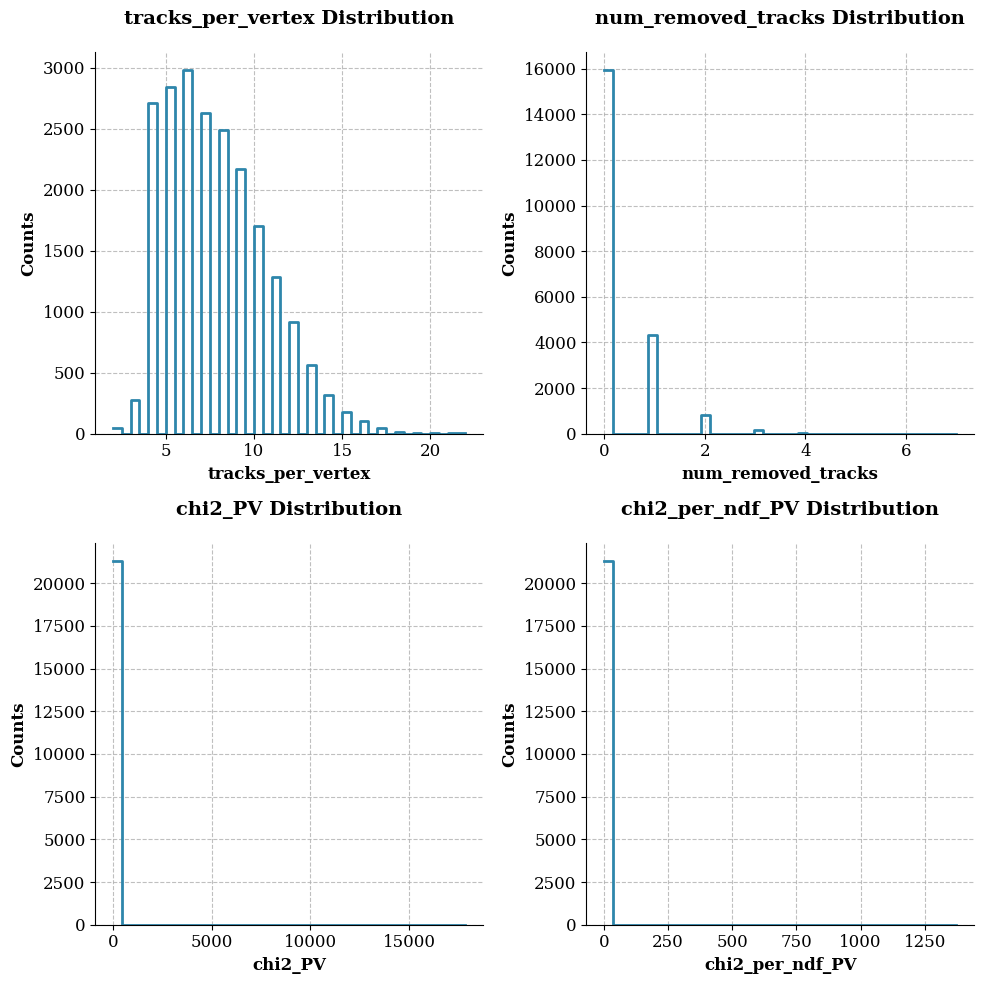

In [19]:
from analysis_scripts.draw_scripts import hist_plot


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='tracks_per_vertex',
    ax=axes[0][0],
    bins=40
)

hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='num_removed_tracks',
    ax=axes[0][1],
    bins=40
)

hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='chi2_PV',
    ax=axes[1][0],
    bins=40
)


hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='chi2_per_ndf_PV',
    ax=axes[1][1],
    bins=40
)

plt.tight_layout()

## Resolutions

### x-projection (cut = 5)

Method: Nelder-Mead
Method: Powell
****************************************************************************************************
New best method: Powell, success: True
****************************************************************************************************
Method: CG
Method: BFGS
Method: Newton-CG
Method: L-BFGS-B
Method: TNC
Method: COBYLA
Method: COBYQA
Method: SLSQP
Skip method: SLSQP
Method: trust-constr
Method: dogleg
Method: trust-ncg
Method: trust-exact
Method: trust-krylov
********************************************************************************
********************************************************************************
********************************************************************************
best_method='Powell'
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 31
Final objective value: 57.755694
Chi-squared: 57.76
Reduced chi-squared: 1.750
---------------------------------------------

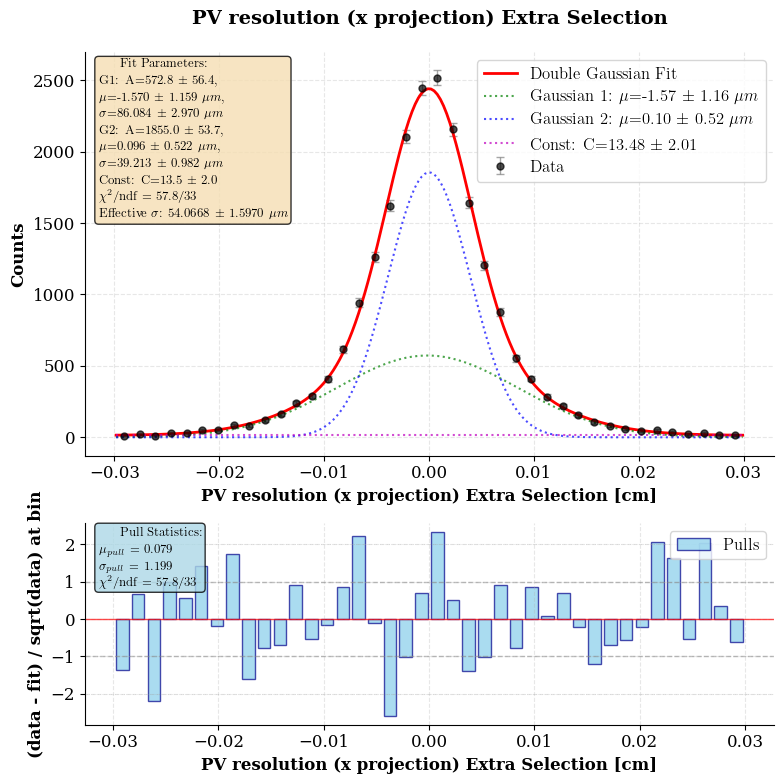

In [20]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


cut = 5.

distr_name = 'PV_diff_ES_x'
PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_x']

sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    with redirect_stdout(io.StringIO()), redirect_stderr(io.StringIO()):
        try:
            fit_res = fit_distr_double_gauss(
                distr=sig_PV_df_sel,
                title=distr_name,
                x_label=distr_name + ' [cm]',
                optimize_method=method,
                plot=False,
                bins=40,
                max_iter=1000
            )
        except:
            print(f'Skip method: {method}')
            continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (x projection) Extra Selection',
    x_label='PV resolution (x projection) Extra Selection [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### y-projection (cut = 5)

Method: Nelder-Mead
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
****************************************************************************************************
New best method: Powell, success: True
****************************************************************************************************
Method: CG
Method: BFGS
Method: Newton-CG
Method: L-BFGS-B
Method: TNC
Method: COBYLA
Method: COBYQA
Method: SLSQP
Skip method: SLSQP
Method: trust-constr
****************************************************************************************************
New best method: trust-constr, success: True
****************************************************************************************************
Method: dogleg
Method: trust-ncg
Method: trust-exact
Method: trust-krylov
**

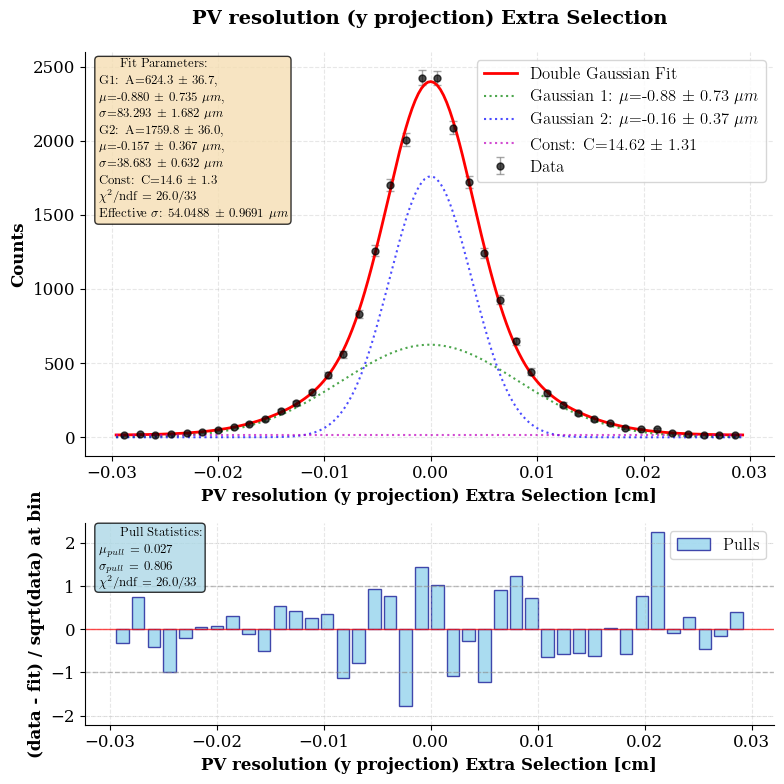

In [21]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


cut = 5.

distr_name = 'PV_diff_ES_y'
PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_y']

sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    with redirect_stdout(io.StringIO()), redirect_stderr(io.StringIO()):
        try:
            fit_res = fit_distr_double_gauss(
                distr=sig_PV_df_sel,
                title=distr_name,
                x_label=distr_name + ' [cm]',
                optimize_method=method,
                plot=False,
                bins=40,
                max_iter=1000
            )
        except:
            print(f'Skip method: {method}')
            continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (y projection) Extra Selection',
    x_label='PV resolution (y projection) Extra Selection [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### z-projection (cut = 5)

Method: Nelder-Mead
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
****************************************************************************************************
New best method: Powell, success: True
****************************************************************************************************
Method: CG
Method: BFGS
Method: Newton-CG
Method: L-BFGS-B
Method: TNC
Method: COBYLA
Method: COBYQA
Method: SLSQP
Skip method: SLSQP
Method: trust-constr
Method: dogleg
Method: trust-ncg
Method: trust-exact
Method: trust-krylov
********************************************************************************
********************************************************************************
********************************************************************************
best_m

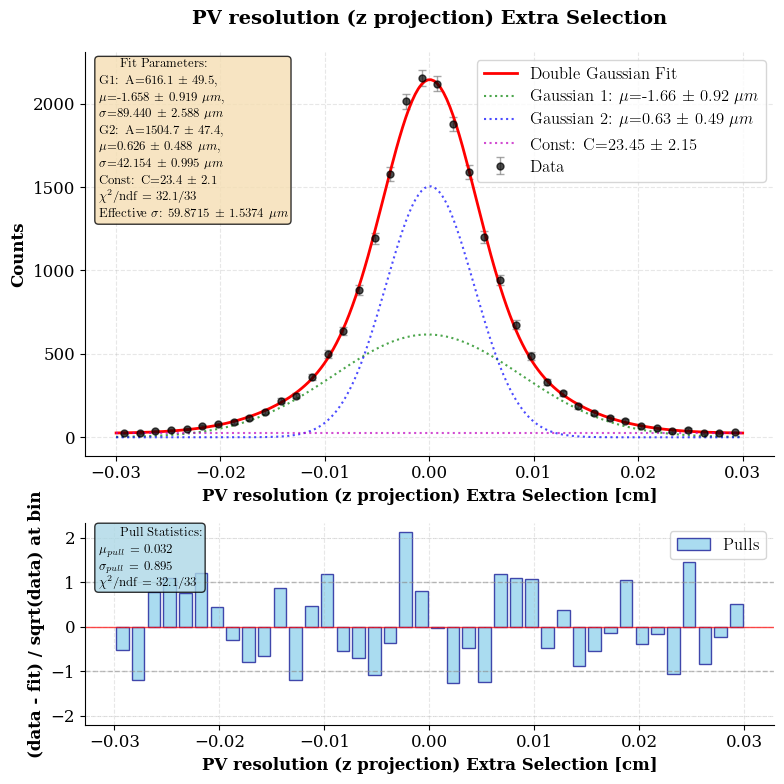

In [22]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


cut = 5.

distr_name = 'PV_diff_ES_z'
PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_z']

sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    with redirect_stdout(io.StringIO()), redirect_stderr(io.StringIO()):
        try:
            fit_res = fit_distr_double_gauss(
                distr=sig_PV_df_sel,
                title=distr_name,
                x_label=distr_name + ' [cm]',
                optimize_method=method,
                plot=False,
                bins=40,
                max_iter=1000
            )
        except:
            print(f'Skip method: {method}')
            continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (z projection) Extra Selection',
    x_label='PV resolution (z projection) Extra Selection [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

# Distributions after PV re-fit (Var-2)

## Prepare Env & Import Data

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import os


try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()

parent_dir = os.path.join(current_dir, '..')
sys.path.insert(0, parent_dir)


df = pd.read_csv('/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/ana_PV_27_var_2.csv')

## max_chi2 distribution

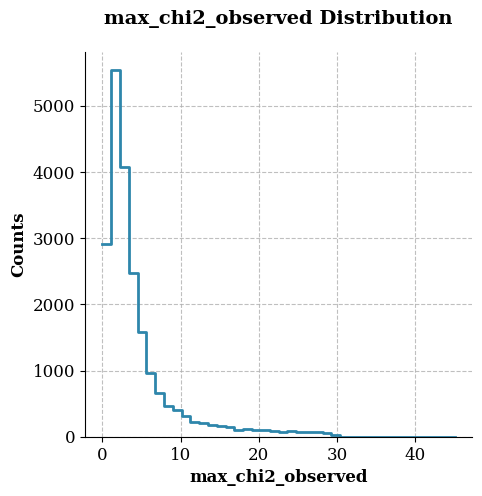

In [24]:
from analysis_scripts.draw_scripts import hist_plot


distr_name = 'max_chi2_observed'

fig, ax = plt.subplots(figsize=(5, 5))

hist_plot(
    data=df[(df['max_chi2_cut'] == 30.0) & (df['max_chi2_observed'] < 50.0)],
    distr_name=distr_name,
    ax=ax,
    bins=40
)

## zeroth approximation

In [25]:
res_x = []
res_y = []
res_z = []

cuts = sorted(df['max_chi2_cut'].unique(), reverse=True)

for cut in cuts:

    PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_x']
    PV_diff_y = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_y']
    PV_diff_z = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_z']

    print(f'\n{'='*50}\nCut value: {cut}\n{'='*50}')

    res_x_val = PV_diff_x[abs(PV_diff_x) < 0.03].std() * 1e4
    res_y_val = PV_diff_y[abs(PV_diff_y) < 0.03].std() * 1e4
    res_z_val = PV_diff_z[abs(PV_diff_z) < 0.03].std() * 1e4

    res_x.append(res_x_val)
    res_y.append(res_y_val)
    res_z.append(res_z_val)

    print(f'Mean number of removed tracks: {df.loc[df['max_chi2_cut'] == cut, 'num_removed_tracks'].mean()}')
    print(f'x-projection PV resolution [cm]: {res_x_val}')
    print(f'y-projection PV resolution [cm]: {res_y_val}')
    print(f'z-projection PV resolution [cm]: {res_z_val}')
    
res_x = np.array(res_x)
res_y = np.array(res_y)
res_z = np.array(res_z)

print(f'Best x at cut: {cuts[res_x.argmin()]}')
print(f'Best y at cut: {cuts[res_y.argmin()]}')
print(f'Best z at cut: {cuts[res_z.argmin()]}')


Cut value: 30.0
Mean number of removed tracks: 0.08070043659922069
x-projection PV resolution [cm]: 73.30686184646147
y-projection PV resolution [cm]: 73.1311732894916
z-projection PV resolution [cm]: 83.31001808255598

Cut value: 12.0
Mean number of removed tracks: 0.1707901037509976
x-projection PV resolution [cm]: 71.32735203265861
y-projection PV resolution [cm]: 71.4758181776582
z-projection PV resolution [cm]: 82.1148024536945

Cut value: 11.0
Mean number of removed tracks: 0.18341861884418573
x-projection PV resolution [cm]: 71.08023957099782
y-projection PV resolution [cm]: 71.43779502260011
z-projection PV resolution [cm]: 82.0585925041709

Cut value: 10.0
Mean number of removed tracks: 0.20027228768602412
x-projection PV resolution [cm]: 70.90805510747144
y-projection PV resolution [cm]: 71.25702343278739
z-projection PV resolution [cm]: 81.93479997327337

Cut value: 9.0
Mean number of removed tracks: 0.2207408102905967
x-projection PV resolution [cm]: 70.7708100524849
y-pro

## Cut properties

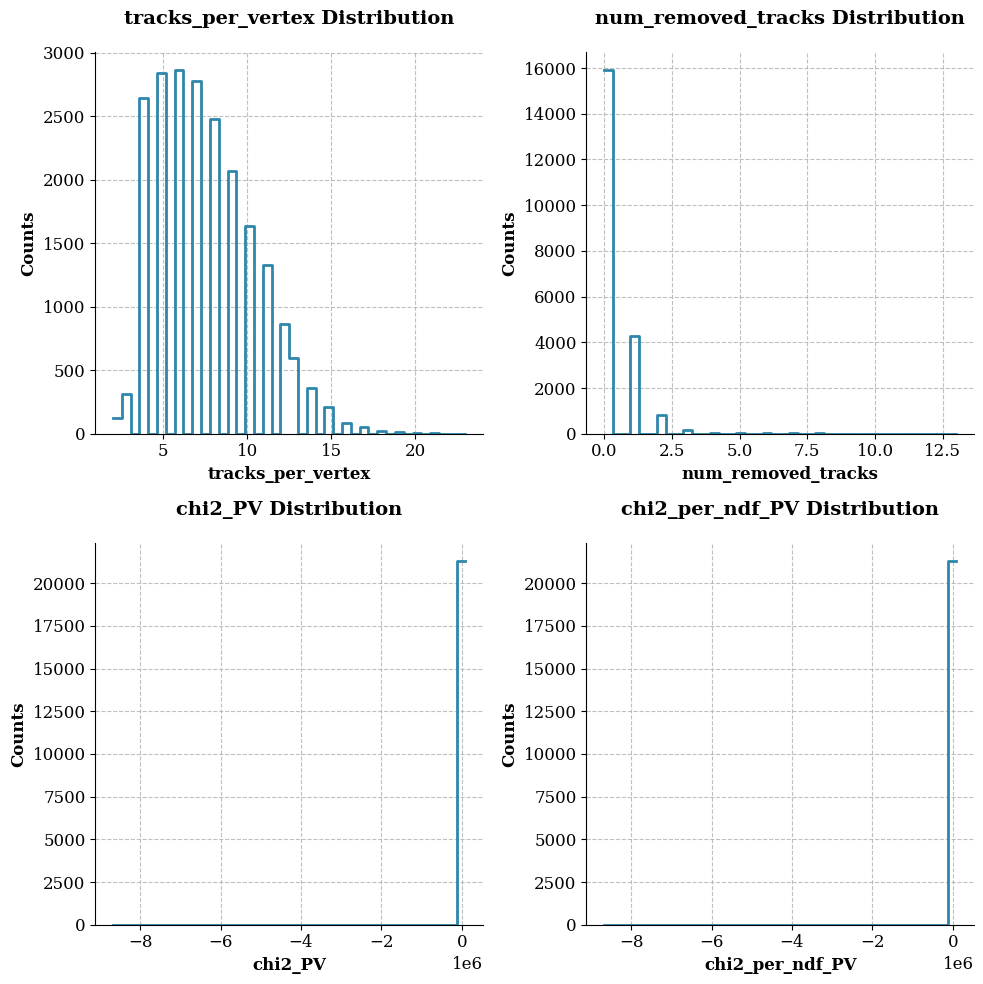

In [26]:
from analysis_scripts.draw_scripts import hist_plot


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='tracks_per_vertex',
    ax=axes[0][0],
    bins=40
)

hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='num_removed_tracks',
    ax=axes[0][1],
    bins=40
)

hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='chi2_PV',
    ax=axes[1][0],
    bins=40
)


hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='chi2_per_ndf_PV',
    ax=axes[1][1],
    bins=40
)

plt.tight_layout()

## Resolutions

### x-projection (cut = 6)

Method: Nelder-Mead
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
****************************************************************************************************
New best method: Powell, success: True
****************************************************************************************************
Method: CG
Method: BFGS
Method: Newton-CG
Method: L-BFGS-B
Method: TNC
Method: COBYLA
Method: COBYQA
Method: SLSQP
Skip method: SLSQP
Method: trust-constr
Method: dogleg
Method: trust-ncg
Method: trust-exact
Method: trust-krylov
********************************************************************************
********************************************************************************
********************************************************************************
best_m

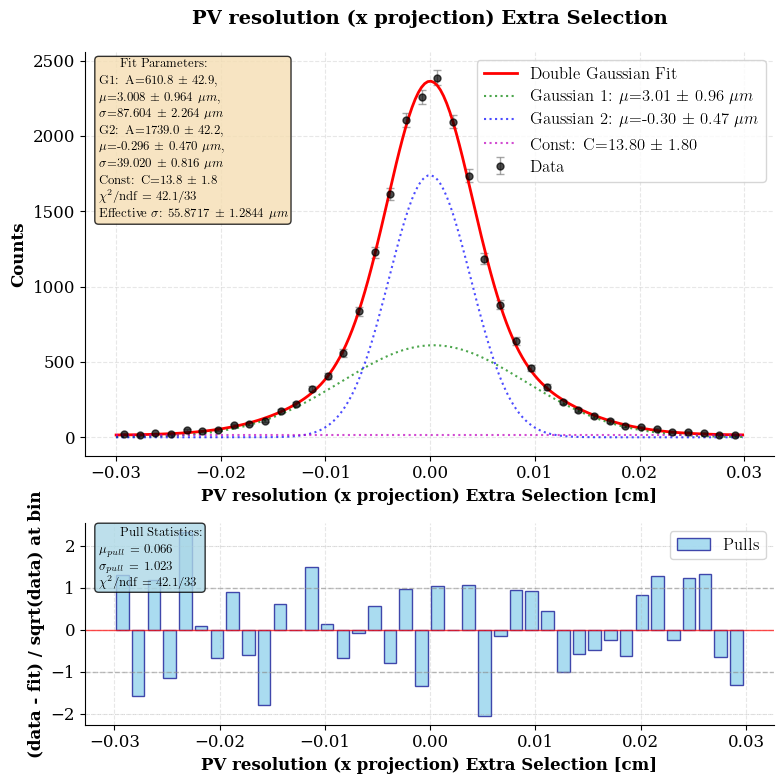

In [27]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


cut = 6.

distr_name = 'PV_diff_ES_x'

PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_x']

sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    with redirect_stdout(io.StringIO()), redirect_stderr(io.StringIO()):
        try:
            fit_res = fit_distr_double_gauss(
                distr=sig_PV_df_sel,
                title=distr_name,
                x_label=distr_name + ' [cm]',
                optimize_method=method,
                plot=False,
                bins=40,
                max_iter=1000
            )
        except:
            print(f'Skip method: {method}')
            continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (x projection) Extra Selection',
    x_label='PV resolution (x projection) Extra Selection [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### y-projection (cut = 6)

Method: Nelder-Mead
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
****************************************************************************************************
New best method: Powell, success: True
****************************************************************************************************
Method: CG
Method: BFGS
Method: Newton-CG
Method: L-BFGS-B
Method: TNC
Method: COBYLA
Method: COBYQA
Method: SLSQP
Skip method: SLSQP
Method: trust-constr
Method: dogleg
Method: trust-ncg
Method: trust-exact
Method: trust-krylov
********************************************************************************
********************************************************************************
********************************************************************************
best_m

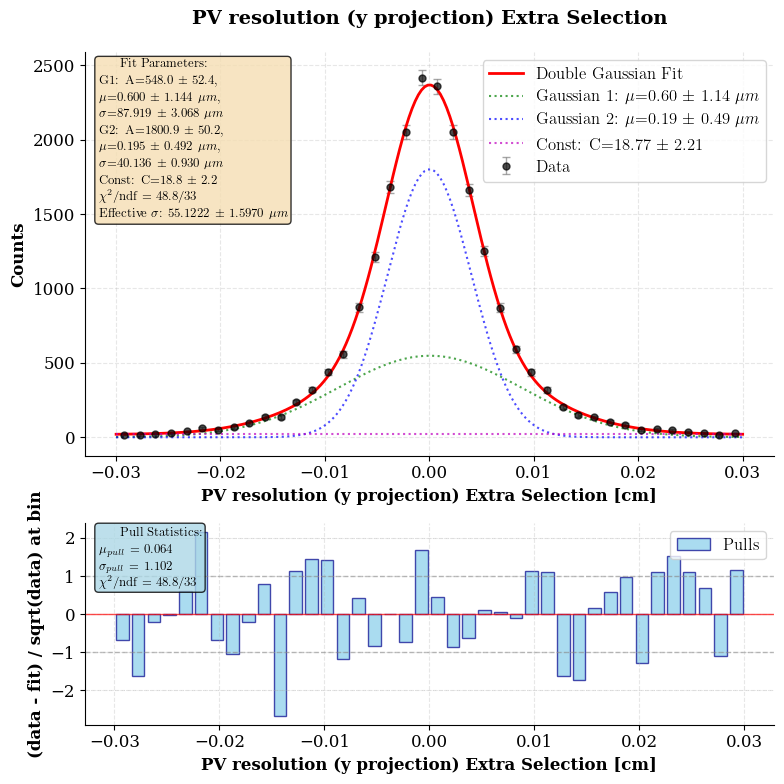

In [28]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


cut = 6.

distr_name = 'PV_diff_ES_y'
PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_y']

sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    with redirect_stdout(io.StringIO()), redirect_stderr(io.StringIO()):
        try:
            fit_res = fit_distr_double_gauss(
                distr=sig_PV_df_sel,
                title=distr_name,
                x_label=distr_name + ' [cm]',
                optimize_method=method,
                plot=False,
                bins=40,
                max_iter=1000
            )
        except:
            print(f'Skip method: {method}')
            continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (y projection) Extra Selection',
    x_label='PV resolution (y projection) Extra Selection [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### z-projection (cut = 6)

Method: Nelder-Mead
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
****************************************************************************************************
New best method: Powell, success: True
****************************************************************************************************
Method: CG
Method: BFGS
Method: Newton-CG
Method: L-BFGS-B
Method: TNC
Method: COBYLA
Method: COBYQA
Method: SLSQP
Skip method: SLSQP
Method: trust-constr
Method: dogleg
Method: trust-ncg
Method: trust-exact
Method: trust-krylov
********************************************************************************
********************************************************************************
********************************************************************************
best_m

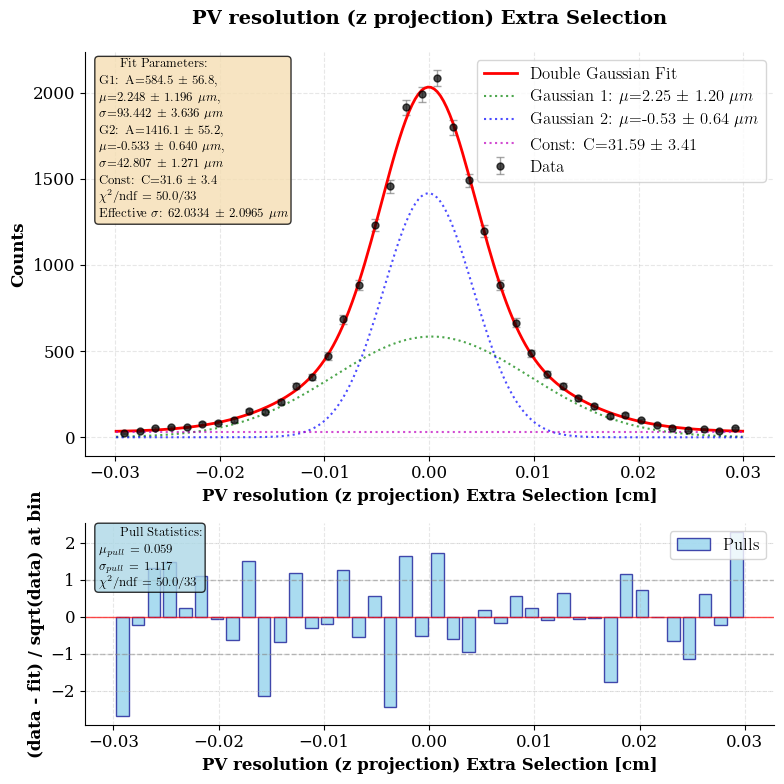

In [29]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


cut = 6.

distr_name = 'PV_diff_ES_z'
PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_z']

sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    with redirect_stdout(io.StringIO()), redirect_stderr(io.StringIO()):
        try:
            fit_res = fit_distr_double_gauss(
                distr=sig_PV_df_sel,
                title=distr_name,
                x_label=distr_name + ' [cm]',
                optimize_method=method,
                plot=False,
                bins=40,
                max_iter=1000
            )
        except:
            print(f'Skip method: {method}')
            continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (z projection) Extra Selection',
    x_label='PV resolution (z projection) Extra Selection [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

# PV Reconstruction Analysis Notes

## Dataset Overview
- **Total size:** ~21,301 primary vertices (PVs)
- **Creation script:** `pv_dataset_27.cpp`

## Key Points

### 1. Resolution Dependence on Track Selection
Resolution significantly depends on the minimum number of tracks available for PV reconstruction. The current selection requires at least 4 tracks:


```cpp
if (KFParticles_PV.size() < 4) continue;
```

* Current PV acceptance: 0.737

* Similar improvement can be achieved by requiring a minimum number of tracks per vertex after the re-fit procedure, which improves resolution while rejecting some PVs.

### 2. Unexplored Selection Factors
The following track selection criteria remain unexplored in this analysis:
```cpp
if (trkPos.Perp() > 0.3 || (PV_pos_prefit - trkPos).Mag() > 0.4) continue;
```

### 3. Re-fit Implementation Notes
* Two PV re-fit implementations have been explored (both in `pv_dataset_27.cpp`)
* PV acceptance is independent of re-fit variant unless restrictions are applied to `tracks_per_vertex` after re-fitting

## Performance Summary
|          | no re-fit | Var I | Var II |
|----------|---------------|---|--------|
|  **x**   |   57.86   | 54.06 | 55.87  |
|  **y**   |   57.74   | 54.05 | 55.12  |
|  **z**   |   64.69   | 59.87 | 62.03  |

### Example of hard selection:

1. if (KFParticles_PV.size() < 5) continue;
2. `tracks_per_vertex` after re-fitting > 5;